<a href="https://colab.research.google.com/github/Bhagyashree-Bhattacharyya/Statistics/blob/main/skLearn_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Place the Google Drive Sharing link
file_share_link = "https://drive.google.com/file/d/1IodHxt5BR9yVYaTXweGJ22I1zRW7jOrm/view?usp=sharing"

# extract the ID of the file
file_id = file_share_link[file_share_link.find("d/")+2 : file_share_link.find("/v")]
print(file_id)
!gdown "$file_id" # Download the data from Google Drive

1IodHxt5BR9yVYaTXweGJ22I1zRW7jOrm
Downloading...
From: https://drive.google.com/uc?id=1IodHxt5BR9yVYaTXweGJ22I1zRW7jOrm
To: /content/Advertising.csv
100% 4.76k/4.76k [00:00<00:00, 16.5MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Simple Linear Regression

In [4]:
# y =  mx + c
# x - single feature
# paramters = m&c
X = df['TV']
y = df['sales']

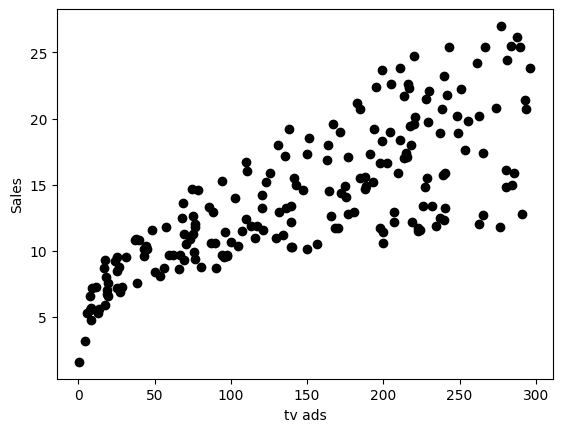

In [5]:
plt.scatter(X,y,c='black')
plt.xlabel('tv ads')
plt.ylabel("Sales")
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X = X.values.reshape(-1,1)

In [8]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [9]:
lr.coef_

array([0.04753664])

In [10]:
lr.intercept_

7.032593549127695

In [11]:
# sales = 0.047*TV + 7.032

sales = 0.047*500 + 7.032
sales

30.532

In [12]:
lr.predict([[500]])

array([30.80091377])

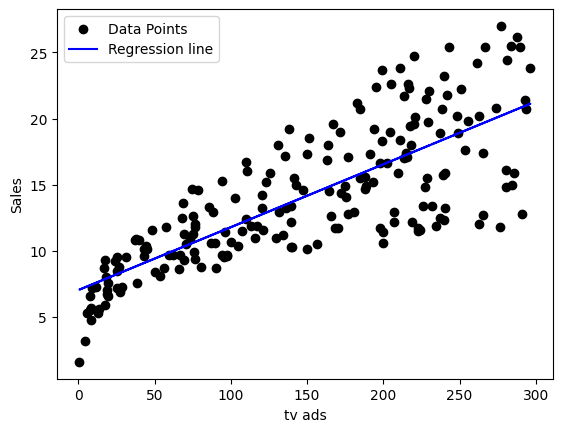

In [13]:
y_pred = lr.predict(X)

plt.scatter(X,y,c='black', label='Data Points')
plt.plot(X,y_pred,c='blue', label='Regression line')
plt.xlabel('tv ads')
plt.ylabel("Sales")
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.611875050850071

Multiple Linear Regression

In [15]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
X = df.drop(columns=['Unnamed: 0', 'sales'])
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [17]:
y = df['sales']

In [18]:
lr = LinearRegression()
lr.fit(X,y)
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [19]:
lr.intercept_

2.938889369459412

In [20]:
lr.predict([[200,40,20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.61226928])

In [21]:
y_pred = lr.predict(X)
r2_score(y,y_pred)

0.8972106381789522

Equation of Linear Regression

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
mean_squared_error(y,y_pred)

2.784126314510936

In [24]:
mean_absolute_error(y,y_pred)

1.252011229687068

In [25]:
mean_squared_error(y,y_pred, squared=False) # RMSE

1.6685701407225697

Assumptions

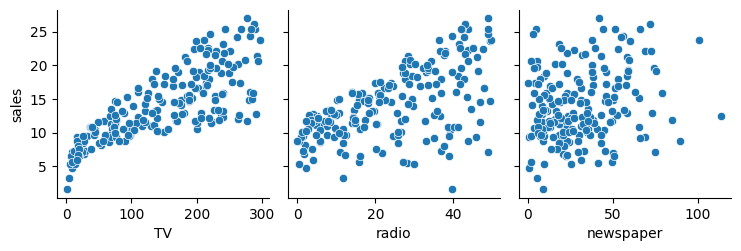

In [26]:
# Linear & Additive
import seaborn as sns
sns.pairplot(df, x_vars= ['TV','radio','newspaper'], y_vars='sales')

In [27]:
# Mean residual is zero
predicts = lr.predict(X)
residuals = (y-predicts)

mean_residuals = np.mean(residuals)
print(f"mean residual is {mean_residuals}")

mean residual is -1.2612133559741778e-15


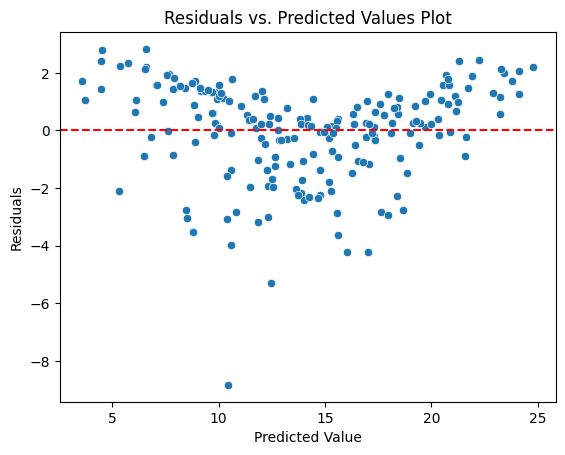

'\nsns.lineplot([min(predicts), max(predicts)], [0, 0], color=\'red\', linestyle=\'--\')  # Adding a horizontal reference line\nplt.xlabel("Predicted Value")\nplt.xlabel("prediction value")\nplt.ylabel(\'residuals\')\nplt.show()'

In [42]:
# Homoskedasticity
p = sns.scatterplot(x=predicts, y=residuals) # Check this line of Code
plt.axhline(y=0, color='red', linestyle='--')  # Adding a horizontal reference line
plt.xlabel("Predicted Value")
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values Plot')
plt.show()
"""
sns.lineplot([min(predicts), max(predicts)], [0, 0], color='red', linestyle='--')  # Adding a horizontal reference line --- it didn't worked IDK why!!
plt.xlabel("Predicted Value")
plt.xlabel("prediction value")
plt.ylabel('residuals')
plt.show()"""

In [34]:
#Check for Homoscedastic
# Gold Feld Quandt Test
# Null  --> Error terms are homoscedastic
# Alternate - Error terms are heterosceastic

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

lzip(['test-statistic','p-value','alternative'],sms.het_goldfeldquandt(residuals,X) )

[('test-statistic', 1.3444110321318348),
 ('p-value', 0.07338571632410308),
 ('alternative', 'increasing')]

<ipython-input-35-a95d86aa8799>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='sales', ylabel='Density'>

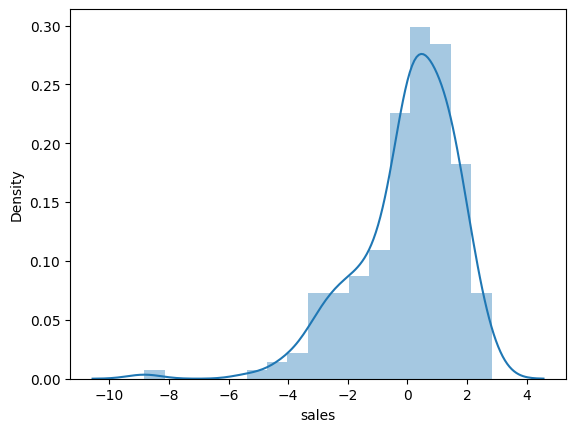

In [35]:
# Normal distribution of error terms
sns.distplot(residuals)

In [36]:
# Multi collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
def vif_score(X):
  X = X.values
  vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
  vif_score = pd.DataFrame()
  vif_score['Features'] = df.drop(columns=['sales',"Unnamed: 0"]).columns
  vif_score['vif_scores'] = vif
  return vif_score

In [38]:
vif_score(df.drop(columns=['sales',"Unnamed: 0"]))
# if vif_score > 4 --> Multicollinearity in the dataset
# if vif_score > 4 --> drop the columns

,Features,vif_scores
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


R2 Score

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y,predicts)

0.8972106381789522